# Assignment 1 - Real Time Face Recognition using Eigen Faces

### Import Necessary Libraries

In [1]:
import numpy as np
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt

### Load the Dataset into Memory

In [2]:
DATA_DIRECTORY = '/home/gowtham/Desktop/PRP/YaleFaceDatabase/'
images = []
labels = []
files = os.listdir(DATA_DIRECTORY)

for i in files:
    images.append(imread(os.path.join(DATA_DIRECTORY,i)))
    labels.append(int(i[7:9]))
images = np.array(images)

### Split the data in 70% as training data and 30% as test data

In [3]:
x_train = []
y_train = []
x_test = []
y_test = []
a = np.zeros(16)
for i in range(len(images)):
    if(a[labels[i]] != 3):
        a[labels[i]] += 1
        x_test.append(images[i])
        y_test.append(labels[i])
    else:
        x_train.append(images[i])
        y_train.append(labels[i])
x_train = np.array(x_train)
x_test = np.array(x_test)

In [4]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 0)



print('Train Shape - ', x_train.shape)
print('Test Shape - ', x_test.shape)
images = None

Train Shape -  (120, 243, 320)
Test Shape -  (45, 243, 320)


### Plot the Image and check its shape

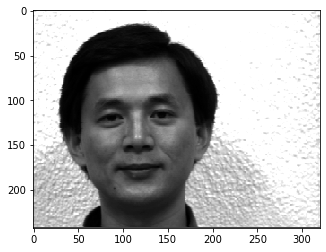

In [5]:
plt.gray()
plt.imshow(x_train[0])

### Take the Average of all Train Images and Plot it to view how it looks

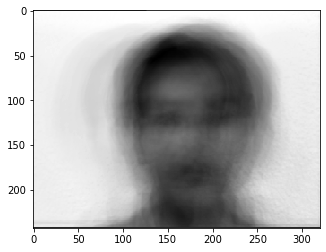

In [6]:
average_image = np.mean(x_train, axis=0)
plt.imshow(average_image)

### Subtract the average Image from all the images in the training set

(120, 243, 320)


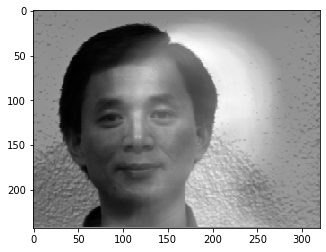

In [7]:
A = x_train - average_image
print(A.shape)
plt.imshow(A[0])

### Flatten the images and join all the Images to form a gaint matrix of flattened Images

In [8]:
A = np.array([i.flatten() for i in A])
print(A.shape)

(120, 77760)


[-13.88333333 -28.13333333 -33.88333333 ...   0.           0.
   0.        ]


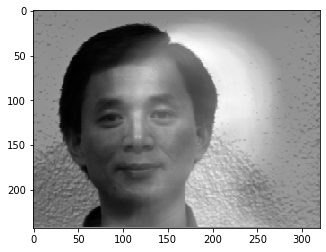

In [9]:
print(A[0])
plt.imshow(np.reshape(A[0], (243, 320)))

### Find the Co-Variance Matrix of A

We actually need to find the eigen values and eigen vectors of the matrix A transpose but we will first find 
the eigen vaues of the matrix A and then get the eigen values/vectors of A.

Eigen Values of matrices A and A transpose are same. We can get eigen vectors of A transpose by multiplying 
eigen vectors of A Transpose with A.

Note: According to the official eigen faces texts, A in this python script is shown as A transpose and vice versa. This is because python numpy combines all the images in that shape.

(120, 120)


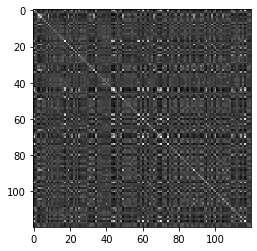

In [10]:
Covariance_matrix = np.matmul(A, A.T)/A.shape[0]
print(Covariance_matrix.shape)
plt.imshow(Covariance_matrix)

### Get the Eigen Values and Eigen Vectors from the Co-Variance Matrix

In [11]:
from sklearn.preprocessing import normalize
ev, evec = np.linalg.eig(Covariance_matrix)
print(ev.shape, evec.shape)

# ev_corrected = np
# evec_corrected = normalize(np.matmul(evec, A), axis=0)
evec_corrected = np.matmul(evec, A)
print(evec_corrected.shape)

(120,) (120, 120)
(120, 77760)


In [12]:
print("Eigen Values: ", ev[:10])

Eigen Values:  [1.06744773e+08+0.j 4.39045446e+07+0.j 3.09056556e+07+0.j
 2.46063491e+07+0.j 1.62136641e+07+0.j 1.30396163e+07+0.j
 9.36002681e+06+0.j 7.75964585e+06+0.j 7.81703060e+06+0.j
 6.02914766e+06+0.j]


In [13]:
print("Eigen Vectors: ", evec_corrected)

Eigen Vectors:  [[12.04947495-1.77232449e-03j -1.21597032-1.47693707e-04j
  -6.76612473-7.29716648e-21j ...  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-1.68206403-1.11847420e-01j  7.44150597-9.32061834e-03j
  11.11263428+2.34401177e-18j ...  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [10.31855274-1.77232449e-03j  6.46971603-1.47693707e-04j
   3.36117274+4.44835706e-21j ...  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 ...
 [12.11702054-3.54464898e-03j  2.79625915-2.95387415e-04j
   1.77387783+5.04577974e-20j ...  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 5.28228267-1.77232449e-03j  7.40697312-1.47693707e-04j
   3.59372498-2.94329608e-20j ...  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-2.65609602-1.77232449e-03j -8.54500893-1.47693707e-04j
  -6.73868756+4.87199458e-

### Plot and check how an eigenvector(eigen face) actually looks

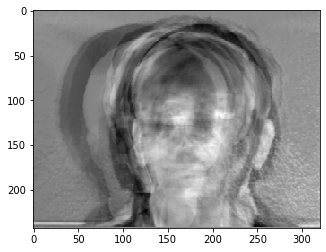

In [14]:
plt.imshow(np.reshape(np.real(evec_corrected[0]), (243, 320)))

### Function for getting Top Eigen Faces (Consider only Principal Components)

In [18]:
def top_evec(ev, evec, k = 15):
    top_evec = []
    eigens = dict(zip(ev, evec_corrected))
    evs = list(eigens.keys())
    evs.sort(reverse = True)
    top_evecs = {}
    for i in range(k):
        top_evecs[evs[i]] = eigens[evs[i]]
    return top_evecs

In [36]:
top_evecs = np.abs(np.array(list(top_evec(ev, evec_corrected, 10).values())))

### Plot top EigenFaces

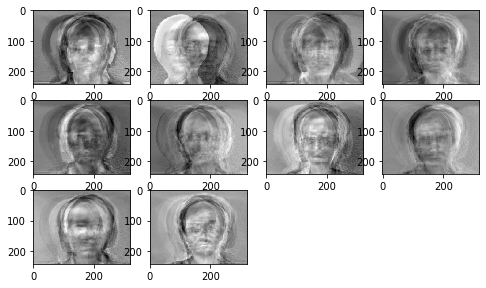

In [20]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
x = 1
for i in top_evecs:
    fig.add_subplot(rows, columns, x)
    plt.imshow(np.reshape(i, (243, 320)))
    x += 1
plt.show()

### Get the weights of each Image by mutiplying the eigen vector matrix with difference between image and the average matrix

In [37]:
w = np.matmul(top_evecs[0].T, A[0])

x_train_pc = []
for i in A:
    w = np.array([np.matmul(top_evec.T, i/255.0) for top_evec in top_evecs])
    x_train_pc.append(w)
x_train_pc = np.array(x_train_pc)


x_test_pc = []
for i in (x_test-average_image):
    w = np.array([np.matmul(top_evec.T, i.flatten()/255.0) for top_evec in top_evecs])
    x_test_pc.append(w)
x_test_pc = np.array(x_test_pc)

### For predciting the face find the face which is closest to the test image 

Use Sklearn Library Knn Function to find the closest image, the default distance metric for the KNN is Euclidean Distance

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_classifier.fit(x_train_pc, y_train)
print("Test Accuaracy: ", knn_classifier.score(x_test_pc, y_test))
print('Train Accuaracy: ', knn_classifier.score(x_train_pc, y_train))

Test Accuaracy:  0.7777777777777778
Train Accuaracy:  1.0


In [39]:
y_pred = knn_classifier.predict(x_test_pc)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
ac = accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)

In [41]:
print(cm)

[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 3 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 3 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 3]]


### Mis-Classified Images

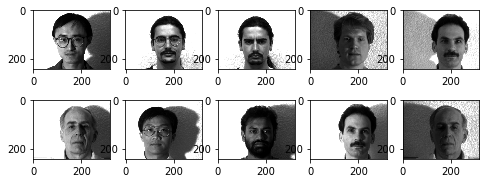

In [44]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
x = 1
for i in range(len(x_test)):
    if(y_pred[i] != y_test[i]):
        fig.add_subplot(rows, columns, x)
        plt.imshow(x_test[i])
        x += 1
plt.show()

### Correctly Classified Images

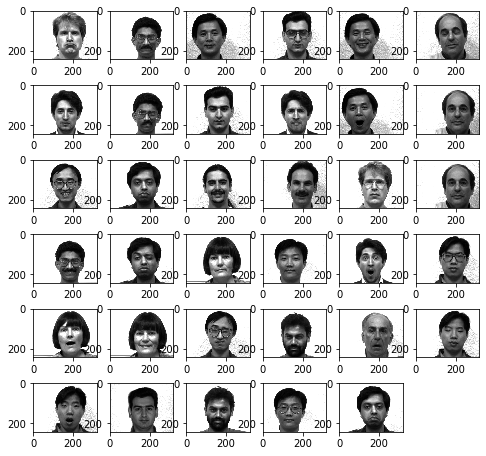

In [45]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 6
rows = 6
x = 1
for i in range(len(x_test)):
    if(y_pred[i] == y_test[i]):
        fig.add_subplot(rows, columns, x)
        plt.imshow(x_test[i])
        x += 1
plt.show()